In [1]:
from final_zillow_functions import (find_model_scores, scale_zillow, find_baseline,
                                    train_val_test, explore_num_features,
                                    explore_bathrooms, explore_bedrooms, explore_sqft,
                                    explore_relationships, check_p_val, train_validate,
                                    wrangle_zillow, q1_stats_test, q2_stats_test,
                                    q3_stats_test, q4_stats_test, final_test)

#Sklearn
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import normaltest, kstest, norm
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from acquire import wrangle_zillow, train_validate, check_p_val, explore_relationships

In [2]:
#Sets options to show more stuff
pd.options.display.max_columns = None
pd.options.display.width = 100
pd.options.display.max_colwidth = None
pd.options.display.max_rows = 200

In [3]:
df = wrangle_zillow()

In [4]:
random_seed = 1969
alpha = 0.05
target_col = 'tax_value'

In [5]:
#Splits data into train, validate and test datasets
train, val, test = train_validate(df)

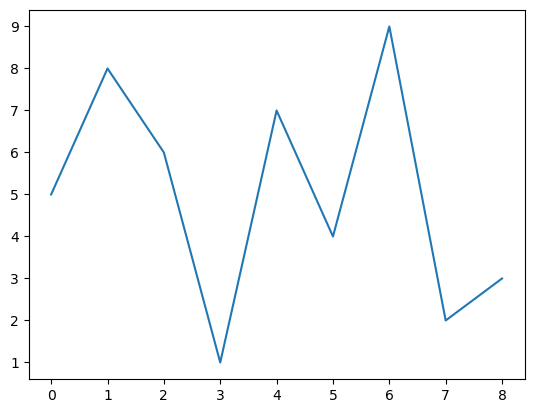

In [13]:
plt.plot(train['transactiondate'].dt.month.unique())

In [7]:
#df.date_column.dt.month

In [9]:
train.head()

,tax_value,bedrooms,bathrooms,sqft,transactiondate,hottub_spa,deck,garagecarcnt,pool,County,latitude,longitude,sqft_bins,value_bins,has_garages,num_of_features
21639,650000.0,4.0,2.0,1838.0,2017-05-05,0,0,2.0,0,Orange,3.371242,-1.179713,2000,$800k,1,1
45333,404515.0,5.0,3.0,2496.0,2017-08-25,0,0,2.0,0,Orange,3.359588,-1.176451,2600,$800k,1,1
23805,755447.0,2.0,2.0,2080.0,2017-05-17,0,0,0.0,0,Los Angeles,3.411112,-1.183276,2200,$800k,0,0
30476,346902.0,3.0,3.0,1606.0,2017-06-16,0,0,0.0,1,Los Angeles,3.444295,-1.183886,1800,$400k,0,1
3516,613911.0,3.0,2.5,1866.0,2017-01-25,0,0,2.0,0,Orange,3.352055,-1.177014,2000,$800k,1,1


In [14]:
metrics = []
num_items = train.transactiondate.dt.month.unique()
num_items.sort()
for item in num_items:
    temp_df = train[train.transactiondate.dt.month == item]['tax_value'].describe()
    temp_metrics = {
        'comparison' : f'{item}',
        'count' : round(temp_df[0],0),
        'mean' : round(temp_df[1],0),
        'std' : round(temp_df[2],0),
        'min' : round(temp_df[3],0),
        '25%' : round(temp_df[4],0),
        '50%' : round(temp_df[5],0),
        '75%' : round(temp_df[6],0),
        'max' : round(temp_df[7],0)}
    metrics.append(temp_metrics)

sale_date_df = pd.DataFrame(metrics)

In [32]:
sale_date_df

,comparison,count,mean,std,min,25%,50%,75%,max
0,1,2460.0,428400.0,354538.0,13817.0,184384.0,344628.0,562216.0,2262509.0
1,2,2239.0,417359.0,343502.0,14577.0,168835.0,337602.0,552992.0,2250000.0
2,3,3403.0,423748.0,346372.0,3254.0,173158.0,350544.0,566020.0,2262840.0
3,4,3172.0,434288.0,349949.0,13524.0,182009.0,356791.0,581002.0,2238000.0
4,5,3820.0,449839.0,370172.0,10504.0,184832.0,354602.0,595000.0,2230037.0
5,6,4277.0,444900.0,351121.0,11089.0,192982.0,368611.0,590000.0,2263546.0
6,7,3408.0,440220.0,340088.0,13616.0,197878.0,367280.0,585000.0,2246748.0
7,8,3599.0,434587.0,343786.0,15433.0,189197.0,361996.0,573477.0,2230037.0
8,9,1725.0,418420.0,327646.0,9242.0,184000.0,351106.0,550306.0,2254064.0


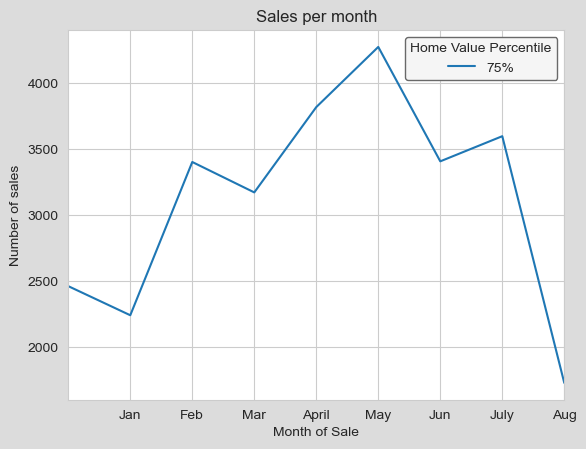

In [29]:
    fig, ax = plt.subplots(facecolor='gainsboro', edgecolor='dimgray')
    sns.set_style('whitegrid', rc={'figure.facecolor':'gainsboro'})
    sns.lineplot(ax=ax, data=sale_date_df, x='comparison', y='count', label = '75%').set(title="Sales per month")
    sns.lineplot(ax=ax, data=sale_date_df, x='comparison', y='count', label = 'mean')
    sns.lineplot(ax=ax, data=sale_date_df, x='comparison', y='count' , label = '50%')
    sns.lineplot(ax=ax, data=sale_date_df, x='comparison', y='count', label = '25%')
    plt.xlim(left=0, right =3)
    plt.ylabel('Number of sales')
    plt.xlabel('Month of Sale')
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8],['Jan','Feb','Mar', 'April', 'May', 'Jun', 'July', 'Aug'])
    #plt.yticks([1000, 2000, 3000, 4000, 5000], ['1k', '2k', '3k', '4k', '5k'])
    plt.legend(title="Home Value Percentile", framealpha=1, facecolor="whitesmoke", edgecolor='dimgray')
    plt.show()